In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import unet_Linear as unet

In [2]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

### Load trained models

In [4]:
pathdir = './papermodels/Jnetmodels/' # directory of trained models

net1 = unet.UNet(depth=3, wf=1, acti_func='relu', scale_factor=4)
net1.load_state_dict(torch.load(pathdir+'NLModule_w1_3layer_data[22].pt'))
net1.eval()
net1 = net1.double()

#net2 = unet.UNet(depth=6, wf=1, acti_func='relu', scale_factor=4)
#net2.load_state_dict(torch.load(pathdir+'NLModule_6layer_data[6, 7].pt'))
#net2.eval()
#net2 = net2.double()
'''
net3 = unet.UNet(depth=6, wf=1, acti_func='identity')
net3.load_state_dict(torch.load(pathdir+'LinearModule_6layer_10Kdata[4, 5].pt'))
net3.eval()
net3 = net3.double()

net4= unet.UNet(depth=6, wf=1, acti_func='relu')
net4.load_state_dict(torch.load(pathdir+'NLModule_6layer_2Kdata[4, 5].pt'))
net4.eval()
net4 = net4.double()

net5= unet.UNet(depth=6, wf=1, acti_func='relu')
net5.load_state_dict(torch.load(pathdir+'NLModule_6layer_5Kdata[4, 5].pt'))
net5.eval()
net5 = net5.double()

net6= unet.UNet(depth=6, wf=1, acti_func='relu')
net6.load_state_dict(torch.load(pathdir+'NLModule_6layer_10Kdata[4, 5].pt'))
net6.eval()
net6 = net6.double()
'''            
netlist = ((r'JNet(3,2) data 22',net1),\
           #(r'JNet(6,1) data 6,7',net2),\
           #(r'lin. 10K data',net3),\
           #(r'relu 2K data',net4),\
           #(r'relu 5K data',net5),(r'relu 10K data',net6)\
          )
           

### Compute statistics of the training data
Wave speed training data

Text(0, 0.5, 'counts')

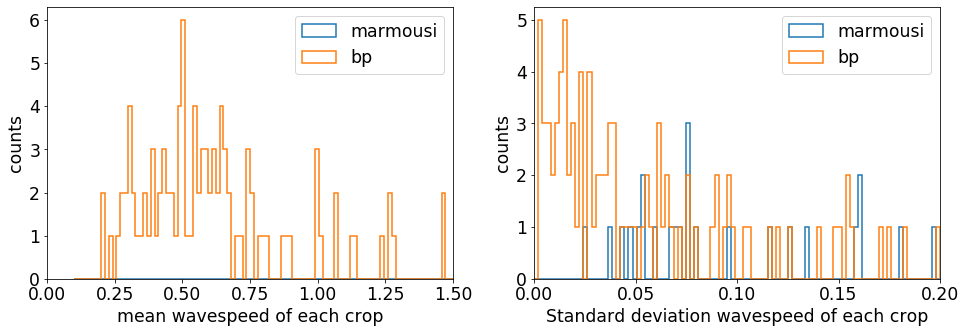

In [5]:
fig = plt.figure(figsize=(16,5))
veldir = './papermodels/'
#marmvel = np.load('./papermodels/marm310cropsM100.npz')
marmvel = np.load(veldir+'mabp4sig_cropsM100.npz')
bpvel = np.load(veldir+'bp310cropsM100.npz')

mmean = marmvel['wavespeedlist'].mean()

ax1 = fig.add_subplot(1,2,1)
pos1= ax1.hist(marmvel['wavespeedlist'].mean((1,2)),bins=np.linspace(0.1,1.5,100),histtype='step',linewidth=1.5)
pos1= ax1.hist(bpvel['wavespeedlist'].mean((1,2)),bins=np.linspace(0.1,1.5,100),histtype='step',linewidth=1.5)
plt.xlim([0,1.5])
ax1.set_xlabel('mean wavespeed of each crop')
ax1.legend([r'marmousi',r'bp'])
ax1.set_ylabel('counts')

ax2 = fig.add_subplot(1,2,2)
pos2= ax2.hist(marmvel['wavespeedlist'].std((1,2)),bins=np.linspace(0.,0.2,100),histtype='step',linewidth=1.5)
pos2= ax2.hist(bpvel['wavespeedlist'].std((1,2)),bins=np.linspace(0.,0.2,100),histtype='step',linewidth=1.5)
plt.xlim([0,0.2])
ax2.set_xlabel('Standard deviation wavespeed of each crop')
ax2.legend([r'marmousi',r'bp'])
ax2.set_ylabel('counts')
#plt.savefig('./figures/trainingD1D2.eps')

Wavefield training data

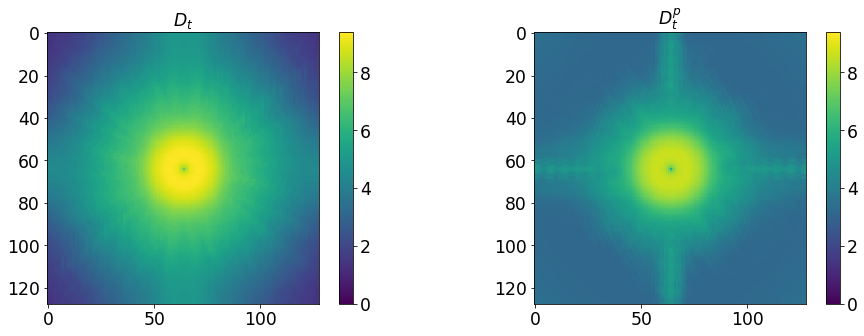

In [5]:
fig = plt.figure(figsize=(16,5))
wavestat = np.load('./wavefieldstatistics.npz')
total_F = np.log10(np.fft.fftshift(wavestat['total_F']))
total_Fp = np.log10(np.fft.fftshift(wavestat['total_Fp']))

vmax_F = np.max(total_F)
ax1 = fig.add_subplot(1,2,1)
pos1= ax1.imshow(total_F,vmin=0,vmax = vmax_F)
#ax1.set_xlim([44,84])
#ax1.set_ylim([44,84])
ax1.set_title(r'$D_t$')
plt.colorbar(pos1)

ax2 = fig.add_subplot(1,2,2)
pos2= ax2.imshow(total_Fp,vmin=0,vmax = vmax_F)
#ax2.set_xlim([44,84])
#ax2.set_ylim([44,84])
ax2.set_title(r'$D^p_t$')
plt.colorbar(pos2)
#plt.savefig('./figures/wavestats.eps')

## Generalization error as a function of sharpness and wavespeed

In [5]:
import WaveUtil
import wave2
import wave2_spectral as wave2s # specify the wave solver
import WavePostprocess as wp
from skimage.transform import resize

In [1]:
# Discretization settings
cT = 0.1
dx = 2.0/128.0
dt = dx/20
x = np.arange(-1,1,dx)
y = np.arange(-1,1,dx)
xx,yy = np.meshgrid(x,y)
center = np.array([0.,0.])
delc = np.arange(-0.9,2.,0.1)
wlist = np.arange(5,20.0,1)

m=2
ny = round(yy.shape[0]/m)
nx = round(xx.shape[1]/m)

vel = 1+0.*xx

NameError: name 'np' is not defined

Compute "ghost" wavefield. That is the output of the model when the wavefield inputs are zero.

In [8]:
# Initial conditions and wave speed profile
u0 = np.zeros([int(np.size(xx,axis=1)/2),int(np.size(yy,axis=0)/2)])
ut0 = np.zeros([int(np.size(xx,axis=1)/2),int(np.size(yy,axis=0)/2)])
fig = plt.figure(figsize=(15,12))
i = 1
#vel = 1 + np.zeros([np.size(xx,axis=1),np.size(yy,axis=0)])
vel = resize(datamarm['marm1smal'],[128,128])/4
#vel = resize(databp['Vsmall'],[128,128])/4
for netname,modl in netlist:
    corrected_uc,corrected_utc = wp.ApplyJNet2WaveSol(u0,ut0,vel,dx,modl)
    plt.subplot(2,2,i)
    plt.imshow(WaveUtil.WaveEnergyField(corrected_uc,corrected_utc,vel,dx),vmax = 1e-3)
    plt.colorbar()
    plt.axis('off')
    plt.title(netname+r' $c_{marmousi}$')
    print(np.max(corrected_utc))
    i +=1
    
#plt.savefig('./ghostJnet02_marm.eps',bbox_inches = "tight")

NameError: name 'datamarm' is not defined

<Figure size 1080x864 with 0 Axes>

Compute validation errors for each initial conditions in constant medium. The varied parameters are the width of the initial pulse and the constant of the wave speed.

In [7]:
errorlist = np.zeros([6,len(delc),len(wlist)])
idx = 0
for netname,modl in netlist:
    w1error = np.zeros([len(delc),len(wlist)])
    for j in range(len(wlist)):
        u0 = np.exp(-wlist[j]**2*((xx-center[0])**2 + (yy-center[1])**2))
        ut0 = np.zeros([np.size(xx,axis=1),np.size(yy,axis=0)])

        u0,ut0 = wave2.wave2(u0,ut0,vel,dx,dt,0.2)

        for i in range(len(delc)):
            veld = vel+delc[i]
            #if netname in 'relu-parareal 0.2cT': cT = 0.2
            #else: cT = 0.1
            
            uc,utc = wave2.wave2(resize(u0,[ny,nx],order=4),resize(ut0,[ny,nx],order=4),resize(veld,[ny,nx],order=4),dx*m,dt*8,cT)
            #uc = resize(uc,u0.shape,order=4)
            #utc = resize(utc,u0.shape,order=4)
            uf,utf = wave2.wave2(u0,ut0,veld,dx,dt,cT)
            corrected_uc,corrected_utc = wp.ApplyJNet2WaveSol(uc,utc,veld,dx,modl)

            energyuf = np.sum(WaveUtil.WaveEnergyField(uf,utf,veld,dx))
            energyerrorfield = WaveUtil.WaveEnergyField(uf-corrected_uc,utf-corrected_utc,veld,dx)/energyuf
            w1error[i,j] = np.sum(energyerrorfield)
    print(netname)    
    errorlist[idx,:,:] = w1error
    idx += 1

C:\Users\huuhi\.julia\conda\3\lib\site-packages\torch\nn\functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


linear 2K data
linear 5K data
Linear 10K data
relu 2K data
relu 5K data
relu 10K data


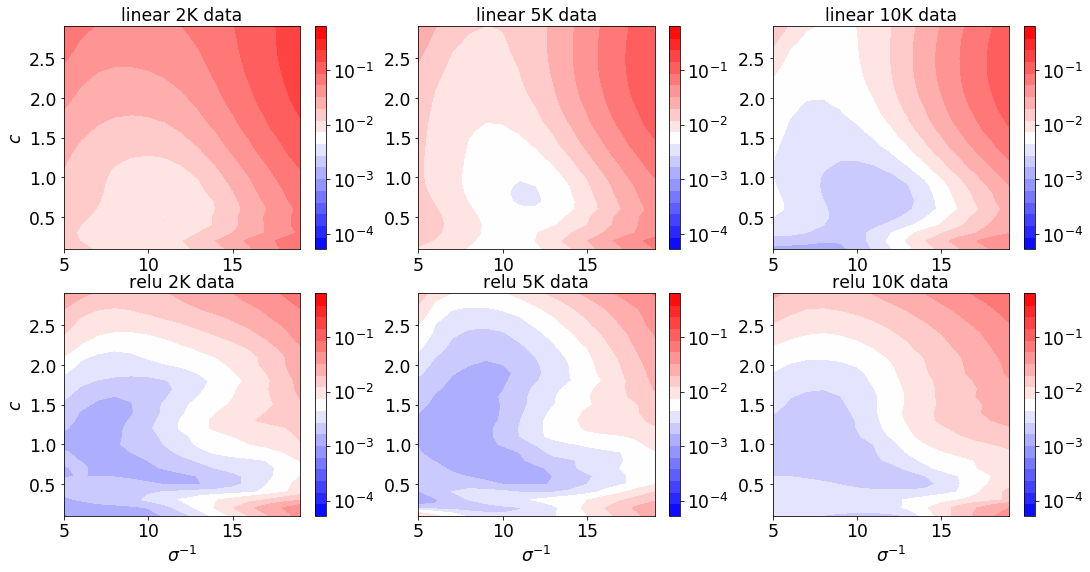

In [15]:
X,Y = np.meshgrid(wlist,delc)
fig = plt.figure(figsize=(18,9))
cmap= 'bwr'
from matplotlib import colors

lev_exp = np.linspace((np.log10(w1error.min()))-1.5,np.ceil(np.log10(w1error.max()))+0.8,20)
levs = np.power(10, lev_exp)
colorticks = [10**-4,10**-3,10**-2,10**-1]

ax1 = fig.add_subplot(2,3,1)
pos1 = ax1.contourf(X,1+Y,errorlist[0,:,:],levels=levs,norm=colors.LogNorm(),cmap = cmap)
#ax1.set_xlabel(r'$\sigma^{-1}$')
ax1.set_ylabel(r'$c$')
fig.colorbar(pos1, ticks=colorticks)
plt.title(netlist[0][0])

ax2 = fig.add_subplot(2,3,4) 
pos2 = ax2.contourf(X,1+Y,errorlist[3,:,:],levels=levs,norm=colors.LogNorm(),cmap = cmap)
ax2.set_xlabel(r'$\sigma^{-1}$')
ax2.set_ylabel(r'$c$')
fig.colorbar(pos1, ticks=colorticks)
plt.title(netlist[3][0])

ax3 = fig.add_subplot(2,3,2) 
pos3 = ax3.contourf(X,1+Y,errorlist[1,:,:],levels=levs,norm=colors.LogNorm(),cmap = cmap)
#ax1.set_xlabel(r'$\sigma^{-1}$')
#ax1.set_ylabel(r'$c$')
fig.colorbar(pos1, ticks=colorticks)
plt.title(netlist[1][0])

ax4 = fig.add_subplot(2,3,5) 
pos4 = ax4.contourf(X,1+Y,errorlist[4,:,:],levels=levs,norm=colors.LogNorm(),cmap = cmap)
ax4.set_xlabel(r'$\sigma^{-1}$')
#ax1.set_ylabel(r'$c$')
fig.colorbar(pos1, ticks=colorticks)
plt.title(netlist[4][0])

ax5 = fig.add_subplot(2,3,3) 
pos5 = ax5.contourf(X,1+Y,errorlist[2,:,:],levels=levs,norm=colors.LogNorm(),cmap = cmap)
#ax1.set_xlabel(r'$\sigma^{-1}$')
#ax1.set_ylabel(r'$c$')
fig.colorbar(pos1, ticks=colorticks)
plt.title(netlist[2][0])

ax6 = fig.add_subplot(2,3,6) 
pos6 = ax6.contourf(X,1+Y,errorlist[5,:,:],levels=levs,norm=colors.LogNorm(),cmap = cmap)
ax6.set_xlabel(r'$\sigma^{-1}$')
#ax1.set_ylabel(r'$c$')
fig.colorbar(pos1, ticks=colorticks)
plt.title(netlist[5][0])

#plt.savefig('./figures/generror_jnetdt02.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


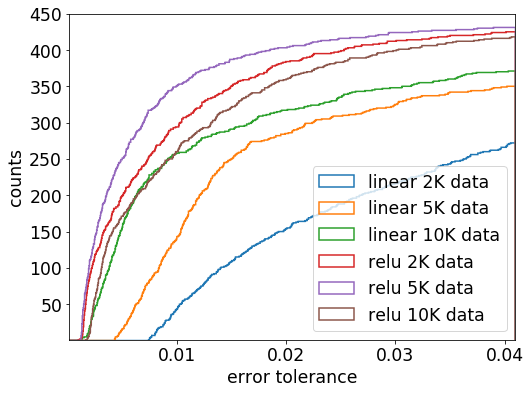

In [16]:
# Visualize above plots in a accumulative way.

plt.figure(figsize=(8,6))
for i in range(6):
    plt.hist(errorlist[i,:,:].flatten(),bins=np.linspace(0,0.041,1000),cumulative=True,\
         histtype='step',linewidth=1.5,linestyle='-',label=netlist[i][0])
#plt.xticks([0,0.01,0.02,0.03,0.04])
plt.ylabel('counts')
plt.xlabel('error tolerance')
plt.xscale('linear')
plt.legend(loc='lower right')
plt.ylim([1,450])
plt.xlim([1e-4,0.041])
#plt.savefig('./figures/generrorcumul_jnetdt02.eps')

## Parareal iteration

In [6]:
import parareal2
import scipy.io as sio
from skimage.transform import resize
from scipy.ndimage import gaussian_filter

databp = sio.loadmat('bp2004.mat')
datamarm = sio.loadmat('marm1nonsmooth.mat')

0.01


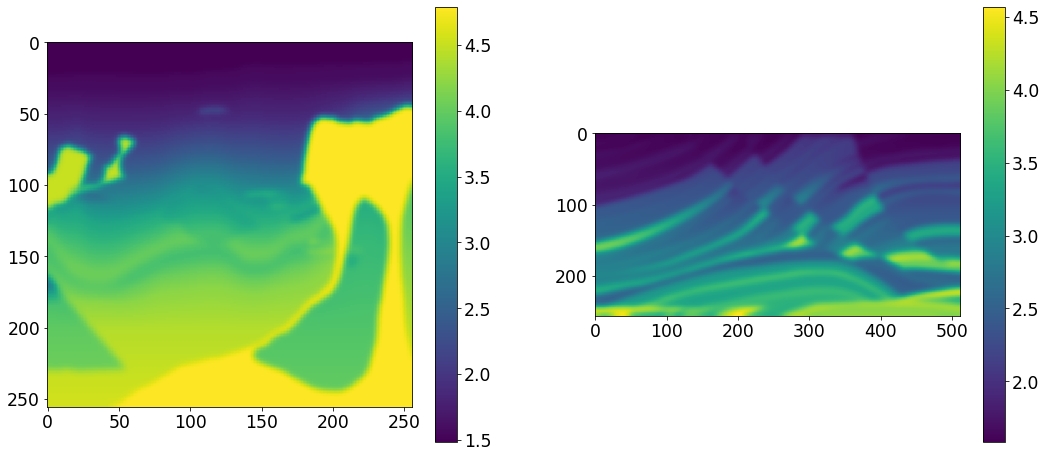

In [7]:
plt.figure(figsize=(18,8))
#plt.imshow(databp['V'][:,1300:3211]/1000,extent=(0,11.9375,0,11.9375));
#plt.colorbar()
# Load wave speed medium
res = 256
dx =  0.01
print(dx)
vel3 = gaussian_filter(resize(databp['V'][:,1300:3211],[res,res]),sigma=2)/1000
vel4 = gaussian_filter(resize(datamarm['marm1larg'][:2042,2181:6265],[res,2*res]),sigma=4)
#gaussian_filter(resize(datamarm['marm1larg'][:2042,3202:5244],[res,res]),sigma=4)


plt.subplot(1,2,1)
plt.imshow(vel3);
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(vel4);
plt.colorbar()
#plt.savefig('Full_bp.eps',bbox_inches = "tight")

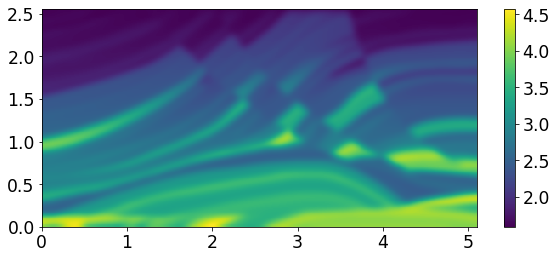

In [8]:
plt.figure(figsize=(10,4))
plt.imshow(vel4,extent=(0,2*dx*255,0,dx*255));
plt.colorbar()
#plt.savefig('subdomain_origmarm.eps',bbox_inches = "tight")

Discretization and parareal iteration settings

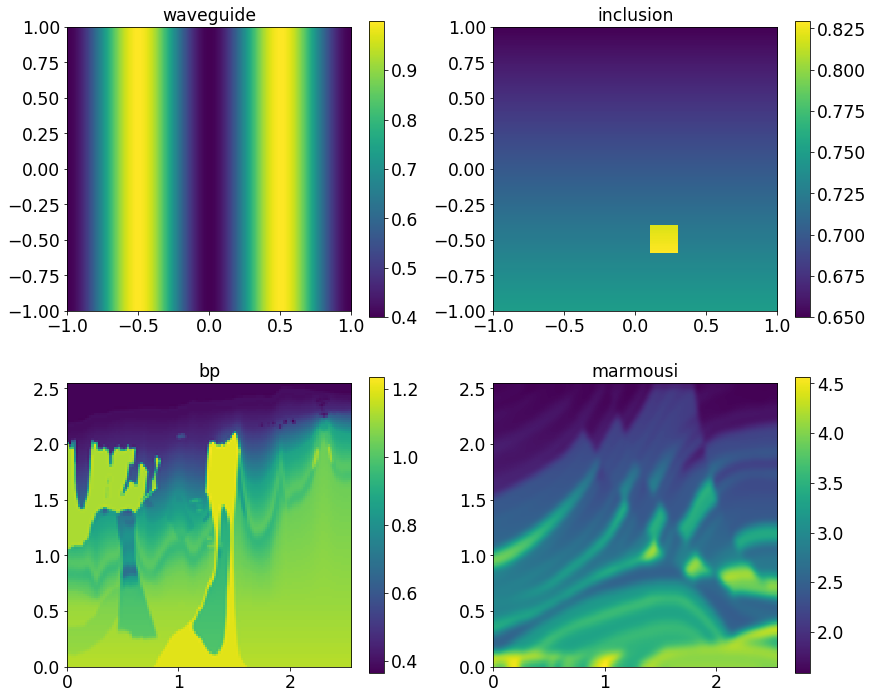

In [9]:
maxiter = 12
Tf = 2.56
cT = 0.128
dx = dx #2.0/128.0
dt = dx/20
#x = np.arange(-1,1,dx)
#y = np.arange(-1,1,dx)
x = np.linspace(-2,2,2*res)
y = np.linspace(-1,1,res)

xx,yy = np.meshgrid(x,y)
np.random.seed = 21
center = np.array([0,0])
mx = 4 # coarse/fine grid ratio in space
mt = 8 # coarse/fine ratio in time stepping

u0 = np.exp(-200.0*((xx-center[0])**2 + (yy-center[1])**2))
u0 = 2/(np.sqrt(3/20)*np.pi**(0.25)) *(1-400*((xx-center[0])**2 + (yy-center[1])**2)) *u0
u0 = u0 / np.max(np.abs(u0))
ut0 = np.zeros_like(u0)

# Test four velocities
#vel = 0.7-0.*(np.abs(xx-0.4)<0.2)*(np.abs(yy-0.5)<0.1)+0.5*(np.abs(xx-0.2)<0.2)*(np.abs(yy-0.3)<0.1) + 0.2*yy
#vel = 0.7 - 0.3*np.cos(np.pi*xx)
#vel = 1 - 0.3*np.exp(-100*(xx-0.3)**2-50*(yy-0.3)**2)
vel1 = 0.7 - 0.3*np.cos(np.pi*xx)
vel2 = 0.7 + 0.05*yy + 0.1*(np.abs(xx-0.4)<0.2)*(np.abs(yy-0.5)<0.1) #0.3*np.exp(-50*(xx-0.3)**2-20*(yy-0.3)**2)
vel3 = gaussian_filter(resize(databp['Vsmall'],[128,128]),sigma=0)/4
vel4 = vel4 #gaussian_filter(resize(datamarm['marm1smal'],[128,128]),sigma=0)/4

#vellist = (('waveguide',vel1),('inclusion',vel2),('BP',vel3),('Marmousi',vel4))
vellist = (('Marmousi',vel4),)

vel = vel4
fig = plt.figure(figsize=(14,12))

ax1 = fig.add_subplot(2,2,1)
subf1 = ax1.imshow(vel1,extent=(-1,1,-1,1))
plt.title('waveguide')
fig.colorbar(subf1)
ax2 = fig.add_subplot(2,2,2)
#subf2 = ax2.imshow(u0)
subf2 = ax2.imshow(vel2,extent=(-1,1,-1,1))
plt.title('inclusion')
fig.colorbar(subf2)
ax3 = fig.add_subplot(2,2,3)
subf3 = ax3.imshow(vel3,extent=(0,dx*255,0,dx*255))
plt.title('bp')
fig.colorbar(subf3)
ax4 = fig.add_subplot(2,2,4)
subf4 = ax4.imshow(vel4,extent=(0,dx*255,0,dx*255))
plt.title('marmousi')
fig.colorbar(subf4)
#plt.savefig('./testhighvelmodels.eps',bbox_inches = "tight")

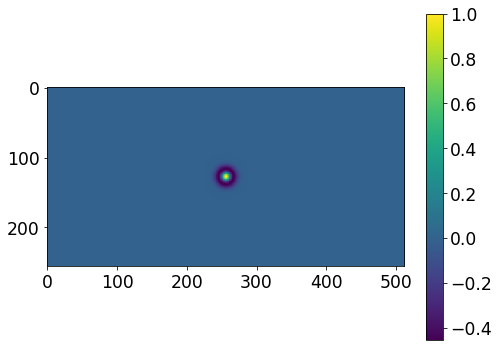

In [15]:
plt.imshow(u0)
plt.colorbar()

For every velocity models, apply the networks and compare them to the Procrustes parareal

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 0
Coarse error: 974.59543859161
OPP error: 212.42523420746545
iteration 1
Coarse error: 541.1954658270329
OPP error: 134.2456234810076
iteration 2
Coarse error: 498.85493324837523
OPP error: 107.17779817601287
iteration 3
Coarse error: 552.8775704045318
OPP error: 114.16794453508845
iteration 4
Coarse error: 604.2993506752288
OPP error: 124.40360609117185
iteration 5
Coarse error: 651.7626460324659
OPP error: 132.4215174792423
iteration 6
Coarse error: 694.4398543671225
OPP error: 143.3408204938096
iteration 7
Coarse error: 740.1687399059412
OPP error: 153.5169877387143
iteration 8
Coarse error: 783.291077645151
OPP error: 165.04186433568594
iteration 9
Coarse error: 826.6389681468877
OPP error: 176.10142540272864
iteration 10
Coarse error: 865.6852907241944
OPP error: 187.96850754147334
0.128


C:\Users\huuhi\Anaconda3\lib\site-packages\torch\nn\functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11


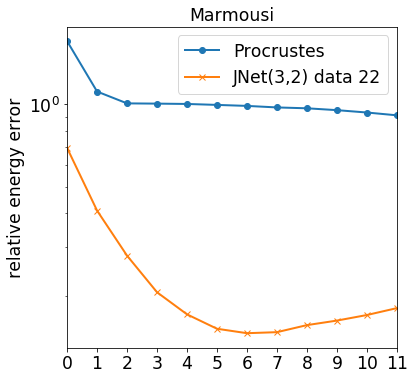

In [10]:
fig1 = plt.figure(figsize=(13,13))
subplotframe = 1

unn_list = []
utnn_list = []
for velname,vel in vellist:    
    #markerlist = ('k-','--d','--x','--o','-d','-x','-o')
    markerlist = ('k-','-o','-x','-d')
    
    uo, uto = parareal2.parareal2_Original(u0,ut0,vel,dx,dt,cT,m=mx,tm=mt,T=Tf+cT,pimax=maxiter)
    up,utp = parareal2.parareal2_Procrustes(u0,ut0,vel,dx,dt,cT,m=mx,tm=mt,T=Tf+cT,pimax=maxiter)
    
    #uexact,utexact,_ = parareal2.InitNetParareal(u0,ut0,vel,dx,dt,cT,1,1,T=Tf+cT,pimax=1)
    #uev = uexact[:,:,:,0]
    #utev = utexact[:,:,:,0]
    uexact,utexact = np.zeros(up.shape[:3]),np.zeros(up.shape[:3])
    uexact[:,:,0],utexact[:,:,0] = u0,ut0
    for j in range(1,uexact.shape[-1]):
        uexact[:,:,j],utexact[:,:,j] = wave2s.wave2(uexact[:,:,j-1],utexact[:,:,j-1],vel,dx,dt,cT)
    
    uev = uexact[:,:,:]
    utev = utexact[:,:,:]
    
    energy_perror = np.zeros(maxiter)
    energy_oerror = np.zeros(maxiter)
    for piter in range(maxiter):
        diff_field = WaveUtil.WaveEnergyField(up[:,:,-1,piter]-uev[:,:,-1],\
                                            utp[:,:,-1,piter]-utev[:,:,-1],vel,dx)
        normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,-1],utev[:,:,-1],vel,dx))
        energy_perror[piter] = np.sum(diff_field)/normenergy
        
        #diff_field = WaveUtil.WaveEnergyField(uo[:,:,-1,piter]-uev[:,:,-1],\
        #                                    uto[:,:,-1,piter]-utev[:,:,-1],vel,dx)
        #normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,-1],utev[:,:,-1],vel,dx))
        #energy_oerror[piter] = np.sum(diff_field)/normenergy
    
    ax1 = fig1.add_subplot(2,2,subplotframe)
    #pos1 = ax1.semilogy(energy_oerror,markerlist[0],linewidth=2,label='Original')
    pos1 = ax1.semilogy(energy_perror,markerlist[1],linewidth=2,label='Procrustes')
    
    midx = 2
               
    for netname,modl in netlist:
        #if r'$0.2$' in netname:
        #    cT = 0.2
        #else:
        #    cT = 0.25
        print(cT)
        unn,utnn = parareal2.parareal2_NNpostprocess(u0,ut0,vel,dx,dt,cT,m=mx,tm=mt,T=Tf+cT,pimax=maxiter,\
                                               net=modl)
        unn_list.append(unn)
        utnn_list.append(utnn)
        energy_error = np.zeros(maxiter)
        for piter in range(maxiter):
            diff_field = WaveUtil.WaveEnergyField(unn[:,:,-1,piter]-uev[:,:,-1],\
                                                utnn[:,:,-1,piter]-utev[:,:,-1],vel,dx)
            normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,-1],utev[:,:,-1],vel,dx))
            energy_error[piter] = np.sum(diff_field)/normenergy
    
    
        pos1 = ax1.semilogy(energy_error,markerlist[midx],linewidth=2,label=netname)
        midx += 1
        
    plt.xlim([0,maxiter-1])
    #plt.ylim([1e-4,10])
    plt.xticks(np.arange(0,maxiter))
    if subplotframe == 3 or subplotframe == 4: 
        plt.xlabel('iteration')
      
    plt.title(velname)
    if subplotframe == 1 or subplotframe == 3: 
        plt.ylabel('relative energy error')
        
    subplotframe += 1 
    
#plt.legend(bbox_to_anchor=(0.8, -0.2),ncol=3)
plt.legend(loc='upper right')
#plt.savefig('./pararealEnergyerror_Tcom01_spectralfine.eps',bbox_inches = "tight")

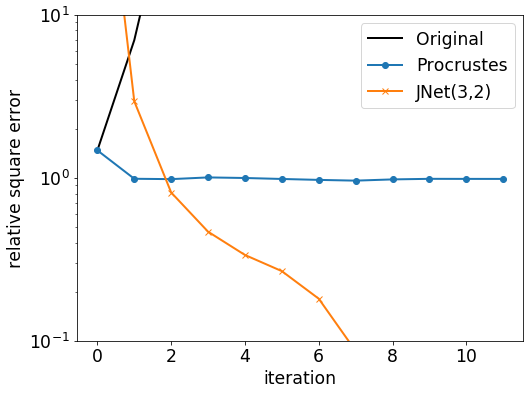

In [11]:
l2_perror = np.zeros(maxiter)
l2_oerror = np.zeros(maxiter)
l2_error = np.zeros(maxiter)

for piter in range(maxiter):
    diff_field = np.square(up[:,:,-1,piter]-uev[:,:,-1])*dx**2
    normenergy = np.sum(np.square(uev[:,:,-1])*dx**2 )
    l2_perror[piter] = np.sum(diff_field)/normenergy

    diff_field = np.square(uo[:,:,-1,piter]-uev[:,:,-1])*dx**2
    l2_oerror[piter] = np.sum(diff_field)/normenergy
    diff_field = np.square(unn[:,:,-1,piter]-uev[:,:,-1])*dx**2
    l2_error[piter] = np.sum(diff_field)/normenergy

plt.figure(figsize=(8,6))
plt.semilogy(l2_oerror,markerlist[0],linewidth=2,label='Original')
plt.semilogy(l2_perror,markerlist[1],linewidth=2,label='Procrustes')
plt.semilogy(l2_error,markerlist[2],linewidth=2,label='JNet(3,2)')
plt.xlabel('iteration')
plt.ylabel('relative square error')
plt.ylim([1e-1,10])
plt.legend()
#plt.savefig('./figures/pararealsquareerror_Marm_spectralfine.eps', bbox_tight='inches')

Visualize the errors in heat map

In [15]:
l2energy_perror = np.zeros((maxiter,up.shape[2]))
l2energy_oerror = np.zeros((maxiter,up.shape[2]))
l2energy_error = np.zeros((maxiter,up.shape[2]))

for piter in range(maxiter):
    for it in range(up.shape[2]):
        diff_field = WaveUtil.WaveEnergyField(up[:,:,it,piter]-uev[:,:,it],\
                                            utp[:,:,it,piter]-utev[:,:,it],vel,dx)
        normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,it],utev[:,:,it],vel,dx))
                        
        l2energy_perror[piter,it] = np.sum(diff_field)/normenergy

        diff_field = WaveUtil.WaveEnergyField(uo[:,:,it,piter]-uev[:,:,it],\
                                            uto[:,:,it,piter]-utev[:,:,it],vel,dx)
        normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,it],utev[:,:,it],vel,dx))
                      
        l2energy_oerror[piter,it] = np.sum(diff_field)/normenergy
        diff_field = WaveUtil.WaveEnergyField(unn_list[0][:,:,it,piter]-uev[:,:,it],\
                                            utnn_list[0][:,:,it,piter]-utev[:,:,it],vel,dx)
        normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,it],utev[:,:,it],vel,dx))
        l2energy_error[piter,it] = np.sum(diff_field)/normenergy

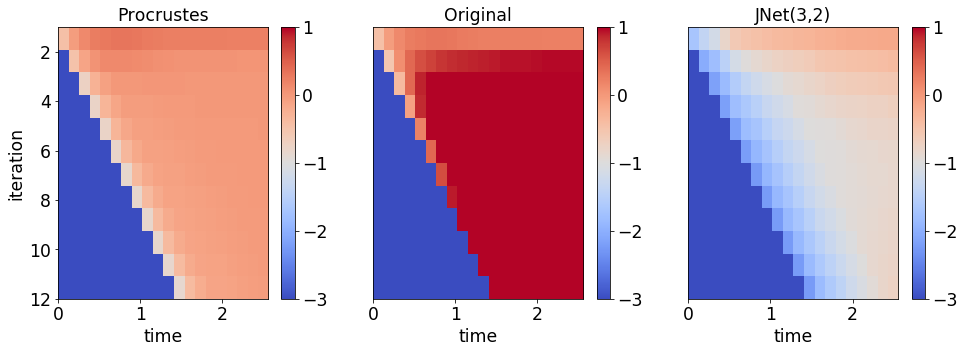

In [16]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,3,1)
subf1 = ax1.imshow(np.log10(l2energy_perror[:,1:]),extent=(0,Tf,maxiter,1),\
                   aspect='auto',vmin=-3,vmax=1.0,cmap='coolwarm')
ax1.set_title('Procrustes')
ax1.set_xlabel('time')
ax1.set_ylabel('iteration')
fig.colorbar(subf1)

ax2 = fig.add_subplot(1,3,2)
subf2 = ax2.imshow(np.log10(l2energy_oerror[:,1:]),extent=(0,Tf,maxiter,1),\
                   aspect='auto',vmin=-3,vmax=1.0,cmap='coolwarm')
ax2.set_title(r'Original')
ax2.set_xlabel('time')
ax2.set_yticks([])
fig.colorbar(subf1)

ax3 = fig.add_subplot(1,3,3)
subf3 = ax3.imshow(np.log10(l2energy_error[:,1:]),extent=(0,Tf,maxiter,1),\
                   aspect='auto',vmin=-3,vmax=1.0,cmap='coolwarm')
ax3.set_title('JNet(3,2)')
ax3.set_xlabel('time')
ax3.set_yticks([])
fig.colorbar(subf1)

#plt.savefig('./figures/heatmapenergyerror_BP_DtDpt.eps', bbox_tight='inches')

Record timing of the solvers

In [79]:
import time

ucoarse,utcoarse = np.zeros(up.shape[:3]),np.zeros(up.shape[:3])
ucoarse[:,:,0],utcoarse[:,:,0] = u0,ut0
cgrid = 64
velc = resize(vel,[cgrid,cgrid*2],order=4)
uc,utc = resize(u0,[cgrid,cgrid*2],order=4),resize(ut0,[cgrid,cgrid*2],order=4)

st = time.time()
for j in range(1,uexact.shape[-1]):
    #uc = resize(ucoarse[:,:,j-1],[cgrid,cgrid*2],order=4)
    #utc = resize(utcoarse[:,:,j-1],[cgrid,cgrid*2],order=4)
    uc, utc = wave2s.wave2(uc,utc,velc,dx*(256/cgrid),dx*(256/cgrid)/10,cT)
    ucoarse[:,:,j] = resize(uc,[256,512],order=4)
    utcoarse[:,:,j] = resize(utc,[256,512],order=4)
    
eta = time.time()-st

In [80]:
print('dx=',dx*(256/cgrid))
print('time ', eta/uexact.shape[-1])

dx= 0.04
time  0.09246256237938291


In [21]:
ucoarse,utcoarse = np.zeros(up.shape[:3]),np.zeros(up.shape[:3])
ucoarse[:,:,0],utcoarse[:,:,0] = u0,ut0
for j in range(1,uexact.shape[-1]):
    ucoarse[:,:,j], utcoarse[:,:,j] = wave2s.wave2(ucoarse[:,:,j-1],utcoarse[:,:,j-1],vel,dx,dt,cT)

16491.605114711892
16410.600216211642


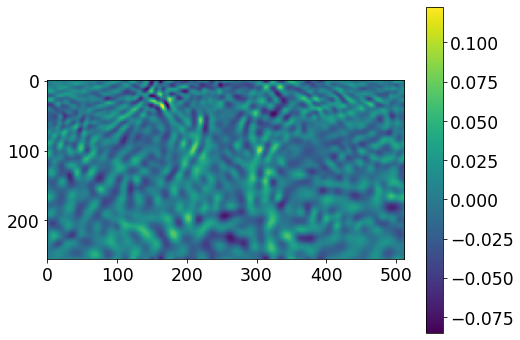

In [78]:
print(np.sum(WaveUtil.WaveEnergyField(uexact[:,:,-1]-ucoarse[:,:,-1], utexact[:,:,-1]-utcoarse[:,:,-1],vel,dx)))
print(np.sum(WaveUtil.WaveEnergyField(uexact[:,:,-1]-unn_list[0][:,:,-1,4], utexact[:,:,-1]-utnn_list[0][:,:,-1,4],vel,dx)))
#print(np.sum(WaveUtil.WaveEnergyField(ucoarse[:,:,1], utcoarse[:,:,1],vel,dx)))

plt.imshow(ucoarse[:,:,-1])
plt.colorbar()

## Plot the solutions on the boundary

ValueError: x and y must have same first dimension, but have shapes (21,) and (512,)

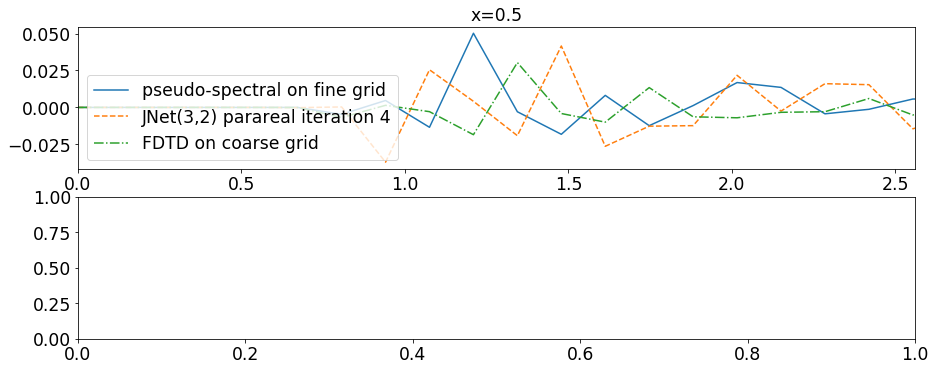

In [21]:
fig2 = plt.figure(figsize=(15,12))
d = np.linspace(0,cT*up.shape[2],up.shape[2])

it = 4

plt.subplot(4,1,1)
yn = 50
ue = uexact[0,:,:]
une = unn[:,yn,:,it]
uec = ucoarse[0,:,:]
plt.plot(d,ue[yn,:],label='pseudo-spectral on fine grid')
plt.plot(d,une[yn,:],linestyle='--',label='JNet(3,2) parareal iteration '+str(it))
plt.plot(d,uec[yn,:],linestyle='-.',label='FDTD on coarse grid')
plt.xlim([0,Tf])
plt.legend(loc='lower left')
plt.title('x='+str(dx*yn))
plt.subplot(4,1,2)
tn = 10
ue = uexact[:,:,tn]
une = ulist[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
plt.xlim([0,dx*255])
plt.title('T='+str(cT*tn))
plt.subplot(4,1,3)
tn=15
ue = uexact[:,:,tn]
une = ulist[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
plt.xlim([0,dx*255])
plt.title('T='+str(cT*tn))
plt.subplot(4,1,4)
tn=20
ue = uexact[:,:,tn]
une = ulist[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
plt.xlim([0,dx*255])
plt.title('T='+str(cT*tn))
plt.xlabel('x')
plt.ylabel('solution')

#plt.savefig('./figures/jnet3_boundarysol_iter2_Marm.eps')

C:\Users\huuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\huuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


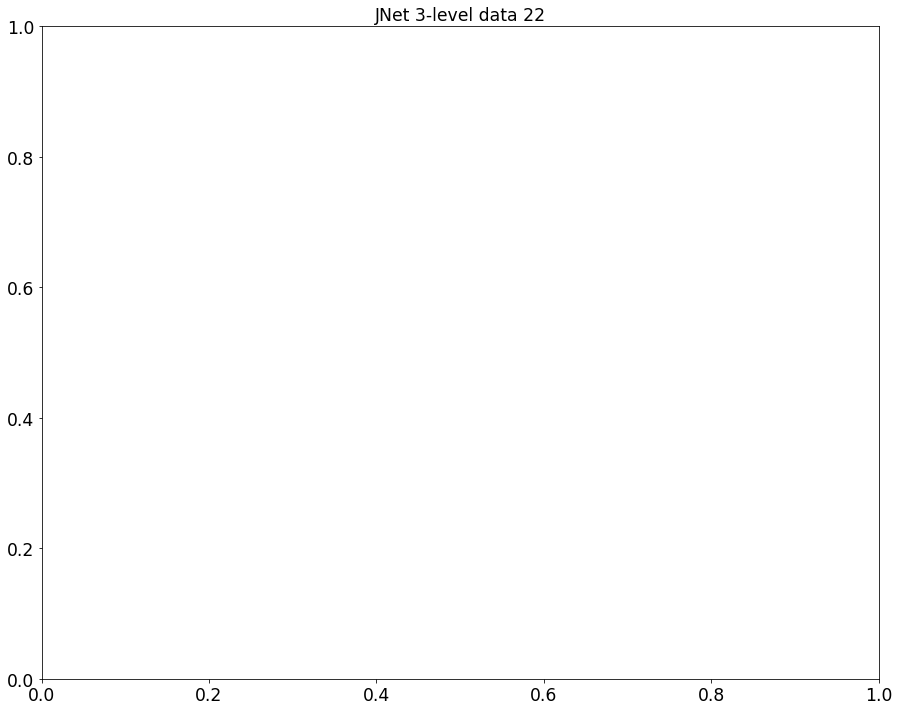

In [16]:
fig2 = plt.figure(figsize=(15,12))
extent = (0,dx*255,0,2*dx*255)

ue = WaveUtil.WaveEnergyField(uexact[:,:,-1], utexact[:,:,-1],vel,dx)
vmin = 0
vmax = 0.5*np.max(ue)

ax1 = fig1.add_subplot(2,2,1)
pos1 = ax1.imshow(ue, extent = extent, vmin = vmin, vmax = vmax)
plt.title('fine solution')
fig1.colorbar(pos1)


upp = WaveUtil.WaveEnergyField(up[:,:,-1,-1], utp[:,:,-1,-1],vel,dx)
ax2 = fig1.add_subplot(2,2,2)
pos2 = ax2.imshow(upp, extent = extent, vmin = vmin, vmax = vmax)
plt.title('Procrustes solution')
fig1.colorbar(pos2)

subplotframe = 3
ulist = []
utlist = []
for netname,modl in netlist:    
    #unn,utnn = parareal2.parareal2_NNpostprocess(u0,ut0,vel,dx,dt,cT,m=mx,tm=mt,T=Tf+cT,pimax=maxiter,\
    #                                           net=modl)
    une = WaveUtil.WaveEnergyField(unn[:,:,-1,-1], utnn[:,:,-1,-1],vel,dx)
    ulist.append(unn)
    utlist.append(utnn)
    
    ax2 = fig1.add_subplot(2,2,subplotframe)
    pos2 = ax2.imshow(une, extent = extent, vmin = vmin, vmax = vmax)
    plt.title(netname)
    fig1.colorbar(pos2)
    subplotframe += 1

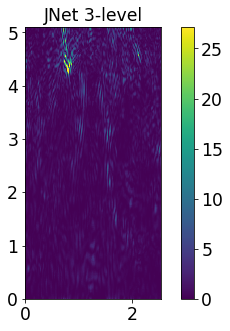

In [19]:
plt.figure(figsize=(7,5))

plt.imshow(une, extent = extent, vmin = vmin, vmax = vmax)
plt.title('JNet 3-level')
plt.colorbar()
#plt.savefig('./figures/jnet3_solution_Marm.eps')

In [99]:
max(d)

5.1000000000000005

Text(0, 0.5, 'solution')

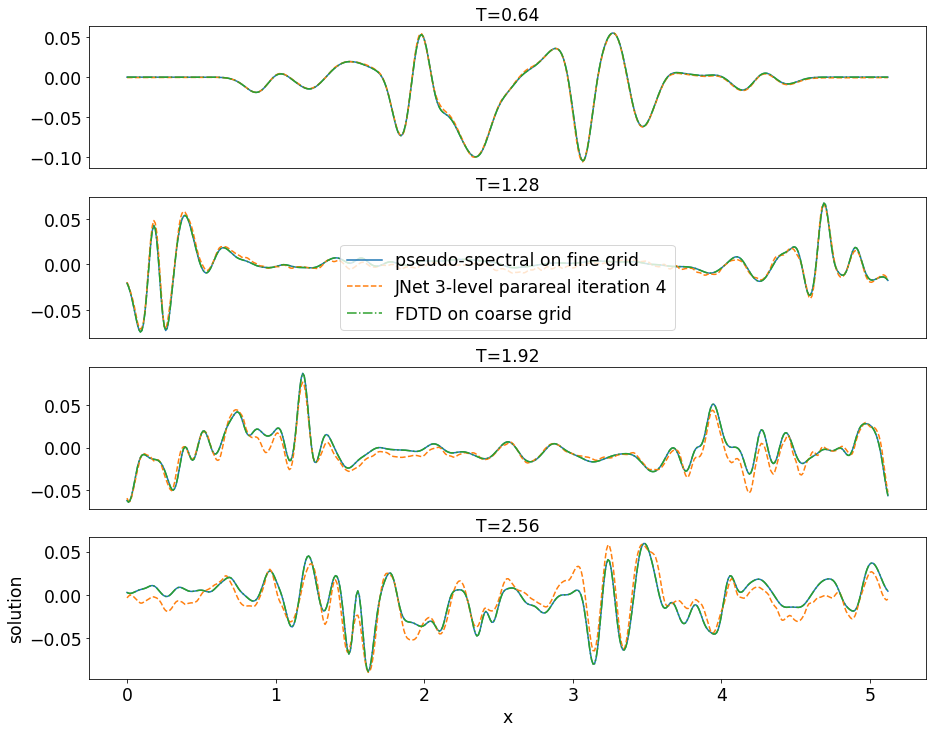

In [22]:
fig2 = plt.figure(figsize=(15,12))
d = np.linspace(0,2*dx*256,2*256)

it = 4

plt.subplot(4,1,1)
tn = 5
ue = uexact[:,:,tn]
une = unn_list[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
#plt.xlim([0,dx*255])

plt.title('T='+str(cT*tn))
plt.xticks([])
plt.subplot(4,1,2)
tn = 10
ue = uexact[:,:,tn]
une = unn_list[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:],label='pseudo-spectral on fine grid')
plt.plot(d,une[0,:],linestyle='--',label='JNet 3-level parareal iteration '+str(it))
plt.plot(d,uec[0,:],linestyle='-.',label='FDTD on coarse grid')
#plt.xlim([0,dx*255])
plt.legend(loc='lower center')
plt.title('T='+str(cT*tn))
plt.xticks([])
plt.subplot(4,1,3)
tn=15
ue = uexact[:,:,tn]
une = unn_list[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
#plt.xlim([0,dx*255])
plt.title('T='+str(cT*tn))
plt.xticks([])
plt.subplot(4,1,4)
tn=20
ue = uexact[:,:,tn]
une = unn_list[0][:,:,tn,it]
uec = ucoarse[:,:,tn]
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
#plt.xlim([0,dx*255])
plt.title('T='+str(cT*tn))
plt.xlabel('x')
plt.ylabel('solution')

#plt.savefig('./figures/jnet3_boundarysol_iter4_Marm.eps')

Text(0, 0.5, 'energy amplitude')

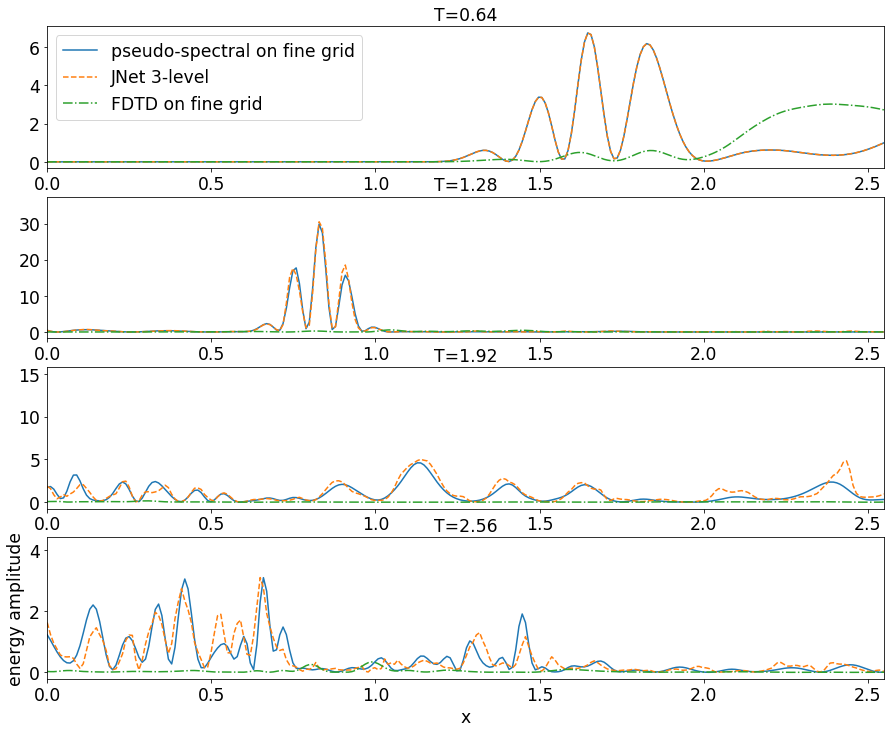

In [50]:
fig2 = plt.figure(figsize=(15,12))
d = np.linspace(0,2*dx*255,2*256)

plt.subplot(4,1,1)
tn = 4
ue = WaveUtil.WaveEnergyField(uexact[:,:,tn], utexact[:,:,tn],vel,dx)
une = WaveUtil.WaveEnergyField(ulist[0][:,:,tn,5], utlist[0][:,:,tn,5],vel,dx)
uec = WaveUtil.WaveEnergyField(ucoarse[:,:,tn], utcoarse[:,:,tn],vel,dx)   
plt.plot(d,ue[0,:],label='pseudo-spectral on fine grid')
plt.plot(d,une[0,:],linestyle='--',label='JNet 3-level')
plt.plot(d,uec[0,:],linestyle='-.',label='FDTD on fine grid')
plt.xlim([0,dx*255])
plt.legend()
plt.title('T='+str(cT*5))
plt.subplot(4,1,2)
tn = 8
ue = WaveUtil.WaveEnergyField(uexact[:,:,tn], utexact[:,:,tn],vel,dx)
une = WaveUtil.WaveEnergyField(ulist[0][:,:,tn,5], utlist[0][:,:,tn,5],vel,dx)
uec = WaveUtil.WaveEnergyField(ucoarse[:,:,tn], utcoarse[:,:,tn],vel,dx)   
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
plt.xlim([0,dx*255])
plt.title('T='+str(cT*10))
plt.subplot(4,1,3)
tn=12
ue = WaveUtil.WaveEnergyField(uexact[:,:,tn], utexact[:,:,tn],vel,dx)
une = WaveUtil.WaveEnergyField(ulist[0][:,:,tn,5], utlist[0][:,:,tn,5],vel,dx)
uec = WaveUtil.WaveEnergyField(ucoarse[:,:,tn], utcoarse[:,:,tn],vel,dx)   
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
plt.xlim([0,dx*255])
plt.title('T='+str(cT*15))
plt.subplot(4,1,4)
tn=16
ue = WaveUtil.WaveEnergyField(uexact[:,:,tn], utexact[:,:,tn],vel,dx)
une = WaveUtil.WaveEnergyField(ulist[0][:,:,tn,5], utlist[0][:,:,tn,5],vel,dx)
uec = WaveUtil.WaveEnergyField(ucoarse[:,:,tn], utcoarse[:,:,tn],vel,dx)   
plt.plot(d,ue[0,:])
plt.plot(d,une[0,:],linestyle='--')
plt.plot(d,uec[0,:],linestyle='-.')
plt.xlim([0,dx*255])
plt.title('T='+str(cT*20))
plt.xlabel('x')
plt.ylabel('energy amplitude')

#plt.savefig('./figures/jnet3_boundarysol_Marm.eps')

In [70]:
import time


st = time.time()
for j in range(1,uexact.shape[-1]):
    uexact[:,:,j],utexact[:,:,j] = wave2s.wave2(uexact[:,:,j-1],utexact[:,:,j-1],vel,dx,dt,cT)
eta = time.time() - st
print(eta)

90.6679937839508


In [71]:
print(eta/(uexact.shape[-1]-1))

4.53339968919754


In [72]:
st = time.time()
unn,utnn = parareal2.parareal2_NNpostprocess(u0,ut0,vel,dx,dt,cT,m=mx,tm=mt,T=Tf+cT,pimax=2,\
                                               net=modl)
eta = time.time() - st

iteration 1
10.983196496963501


In [76]:
print(eta)
print(unn.shape)
print(eta/(unn.shape[2]-1)/unn.shape[-1])

109.83196496963501
(256, 512, 21, 2)
2.7457991242408752


### Domain Decomposition

In [10]:
vel5 = gaussian_filter(resize(datamarm['marm1larg'][:2042,2181:6265],[res,2*res]),sigma=4)

(256, 512)


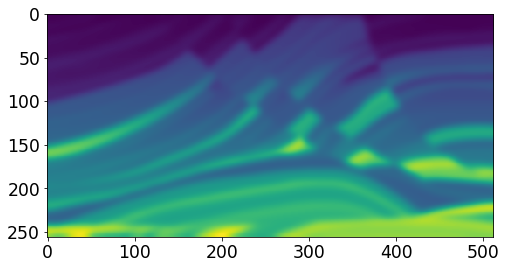

In [11]:
print(vel5.shape)
plt.imshow(vel5)

In [17]:
x = np.linspace(-2,2,2*res)
y = np.linspace(-1,1,res)

xx,yy = np.meshgrid(x,y)
center = np.array([0,0])
mx = 4
mt = 8

u0 = np.exp(-200.0*((xx-center[0])**2 + (yy-center[1])**2))
u0 = 2/(np.sqrt(3/20)*np.pi**(0.25)) *(1-400*((xx-center[0])**2 + (yy-center[1])**2)) *u0
u0 = u0 / np.max(np.abs(u0))
ut0 = np.zeros_like(u0)

In [34]:
uexact,utexact = np.zeros((res,2*res,int(Tf/cT)+1)),np.zeros((res,2*res,int(Tf/cT)+1))
uexact[:,:,0],utexact[:,:,0] = u0,ut0
for j in range(1,uexact.shape[-1]):
    uexact[:,:,j],utexact[:,:,j] = wave2s.wave2(uexact[:,:,j-1],utexact[:,:,j-1],vel5,dx,dt,cT)

In [19]:
undd,utndd = parareal2.parareal2_NNpostprocess(u0,ut0,vel5,dx,dt,cT,m=mx,tm=mt,T=Tf+cT,pimax=maxiter,\
                                               net=net1)

C:\Users\huuhi\Anaconda3\lib\site-packages\torch\nn\functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


(256, 512, 21, 10)


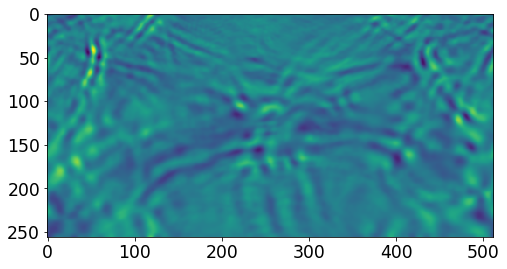

In [35]:
print(undd.shape)
plt.imshow(undd[:,:,15,-1])

(256, 512, 21)


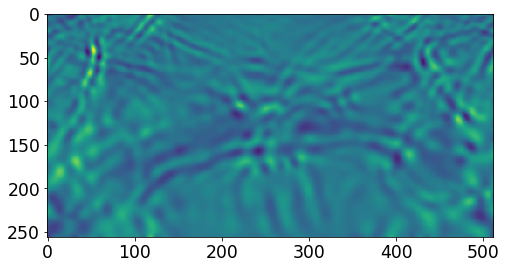

In [36]:
print(uexact.shape)
plt.imshow(uexact[:,:,15])

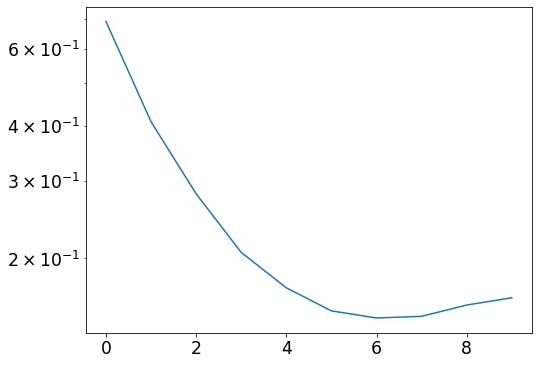

In [37]:
energy_error = np.zeros(maxiter)
for piter in range(maxiter):
    diff_field = WaveUtil.WaveEnergyField(undd[:,:,-1,piter]-uexact[:,:,-1],\
                                        utndd[:,:,-1,piter]-utexact[:,:,-1],vel5,dx)
    normenergy = np.sum(WaveUtil.WaveEnergyField(uexact[:,:,-1],utexact[:,:,-1],vel5,dx))
    energy_error[piter] = np.sum(diff_field)/normenergy
    
plt.figure()
plt.semilogy(energy_error)

#### Sequential parareal blocks

0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4
0.25
iteration 1
iteration 2
iteration 3
iteration 4
iteration 1
iteration 2
iteration 3
iteration 4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


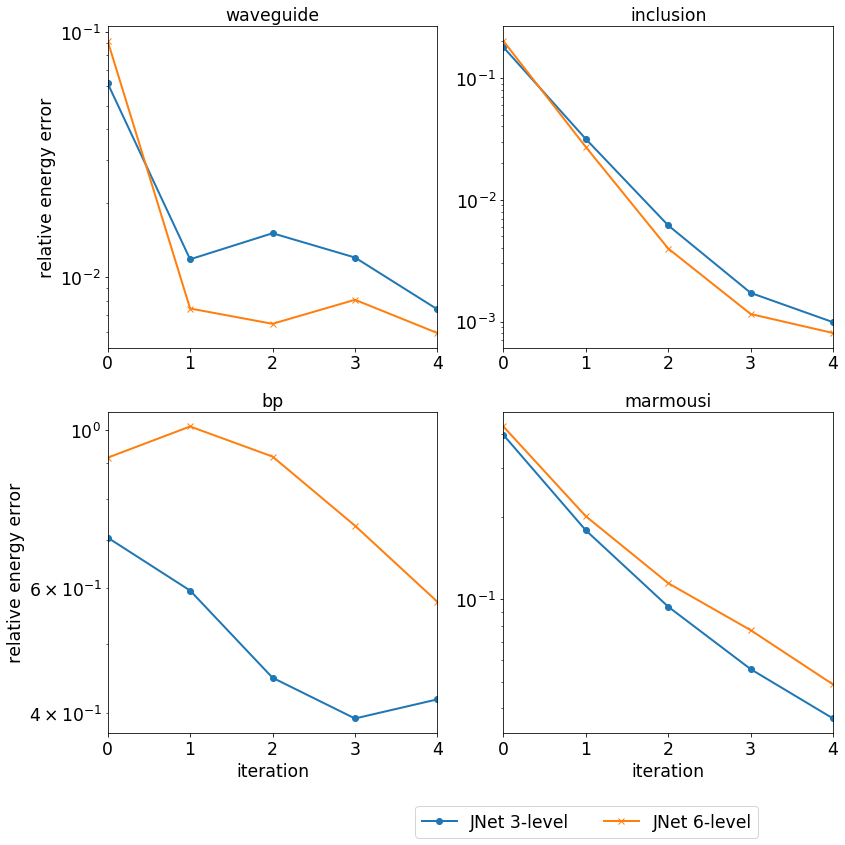

In [15]:
maxiter = 5
Tf = 4.0
Tb = 2.0
mb = int(Tf/Tb)
u0 = np.exp(-200.0*((xx-center[0])**2 + (yy-center[1])**2))
ut0 = np.zeros([np.size(xx,axis=1),np.size(yy,axis=0)])

fig1 = plt.figure(figsize=(13,13))
subplotframe = 1

for velname,vel in vellist:
    uexact,utexact,_ = parareal2.InitNetParareal(u0,ut0,vel,dx,dt,cT,1,1,T=Tf+cT,pimax=1)
    
    uev = uexact[:,:,:,0]
    utev = utexact[:,:,:,0]
    
    markerlist = ('-o','-x','-d')
    
    ax1 = fig1.add_subplot(2,2,subplotframe)
    midx = 0
    
    for netname,modl in netlist:
        #if r'$0.2$' in netname:
        #    cT = 0.2
        #else:
        #    cT = 0.25
        print(cT)
        unn,utnn = np.zeros(up.shape),np.zeros(up.shape)
        un0 = np.copy(u0)
        utn0 = np.copy(ut0)
        for b in range(mb):
            stidx = b*int(Tb/cT)
            enidx = (b+1)*int(Tb/cT)
            un,utn = parareal2.parareal2_NNpostprocess(un0,utn0,\
                                                       vel,dx,dt,cT,m=2,tm=8,T=Tb+cT,pimax=maxiter,\
                                                       net=modl,continue_train=False) 
            unn[:,:,stidx:enidx,:],utnn[:,:,stidx:enidx,:] = un[:,:,:-1,:],utn[:,:,:-1,:]
            un0 = un[:,:,-1,-1]
            utn0 = utn[:,:,-1,-1]
        unn[:,:,-1,:],utnn[:,:,-1,:] = un[:,:,-1,:],utn[:,:,-1,:]
            
    
        energy_error = np.zeros(maxiter)
        for piter in range(maxiter):
            diff_field = WaveUtil.WaveEnergyField(unn[:,:,-1,piter]-uev[:,:,-1],\
                                                utnn[:,:,-1,piter]-utev[:,:,-1],vel,dx)
            normenergy = np.sum(WaveUtil.WaveEnergyField(uev[:,:,-1],utev[:,:,-1],vel,dx))
            energy_error[piter] = np.sum(diff_field)/normenergy
    
    
        pos1 = ax1.semilogy(energy_error,markerlist[midx],linewidth=2,label=netname)
        midx += 1
        
    plt.xlim([0,maxiter-1])
    #plt.ylim([1e-2,10])
    plt.xticks(np.arange(0,maxiter))
    if subplotframe == 3 or subplotframe == 4: 
        plt.xlabel('iteration')
      
    plt.title(velname)
    if subplotframe == 1 or subplotframe == 3: 
        plt.ylabel('relative energy error')
        
    subplotframe += 1 
    
plt.legend(bbox_to_anchor=(0.8, -0.2),ncol=3)
#plt.savefig('./pararealSeqBlck_Tcom025_netInit.eps',bbox_inches = "tight")